In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
filepath = r"C:\Users\5608t\OneDrive\桌面\QS World University Rankings 2025 (Top global universities).csv"
df = pd.read_csv(filepath)
df.head()

,RANK_2025,RANK_2024,Institution_Name,Location,Region,SIZE,FOCUS,RES.,STATUS,Academic_Reputation_Score,...,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
0,1,1,Massachusetts Institute of Technology (MIT),United States,Americas,M,CO,VH,B,100,...,100,86.8,143,96,58,100,8,99,15=,100
1,2,6,Imperial College London,United Kingdom,Europe,L,FC,VH,A,98.5,...,66,99.6,44,97.4,34,93.4,61,99.7,6,98.5
2,3,3,University of Oxford,United Kingdom,Europe,L,FC,VH,A,100,...,120,97.7,73,100,1,100,3,85,126,96.9
3,4,4,Harvard University,United States,Americas,L,FC,VH,B,100,...,269,69,215,99.6,5,100,1,84.4,130,96.8
4,5,2,University of Cambridge,United Kingdom,Europe,L,FC,VH,A,100,...,73,94.8,98,99.3,10,100,5,84.8,127=,96.7


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   RANK_2025                             1503 non-null   object
 1   RANK_2024                             1482 non-null   object
 2   Institution_Name                      1503 non-null   object
 3   Location                              1503 non-null   object
 4   Region                                1503 non-null   object
 5   SIZE                                  1503 non-null   object
 6   FOCUS                                 1503 non-null   object
 7   RES.                                  1503 non-null   object
 8   STATUS                                1466 non-null   object
 9   Academic_Reputation_Score             1503 non-null   object
 10  Academic_Reputation_Rank              1503 non-null   object
 11  Employer_Reputation_Score     

In [19]:
df.isnull().sum()

RANK_2025                                 0
RANK_2024                                21
Institution_Name                          0
Location                                  0
Region                                    0
SIZE                                      0
FOCUS                                     0
RES.                                      0
STATUS                                   37
Academic_Reputation_Score                 0
Academic_Reputation_Rank                  0
Employer_Reputation_Score                 0
Employer_Reputation_Rank                  0
Faculty_Student_Score                     0
Faculty_Student_Rank                      0
Citations_per_Faculty_Score               0
Citations_per_Faculty_Rank                2
International_Faculty_Score             100
International_Faculty_Rank               99
International_Students_Score             58
International_Students_Rank              57
International_Research_Network_Score      1
International_Research_Network_R

In [20]:
exclude_cols = ["Institution_Name","Location","Region","SIZE","FOCUS","RES.","STATUS"]
for col in df.columns:
    if col not in exclude_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True,subset = "Overall_Score")
df["STATUS"] = df["STATUS"].fillna(df["STATUS"].mode()[0])
score_cols = ["International_Faculty_Score","International_Students_Score","International_Research_Network_Score","Sustainability_Score"]
rank_cols = ["International_Students_Rank","International_Research_Network_Rank","Sustainability_Rank","International_Faculty_Rank","Citations_per_Faculty_Rank"]
for col in score_cols:
    df[col] = df[col].fillna(df[col].mean())
for col in rank_cols:
    df[col] = df[col].fillna(999)
df.isnull().sum()

RANK_2025                                 0
RANK_2024                                30
Institution_Name                          0
Location                                  0
Region                                    0
SIZE                                      0
FOCUS                                     0
RES.                                      0
STATUS                                    0
Academic_Reputation_Score                 0
Academic_Reputation_Rank                105
Employer_Reputation_Score                 0
Employer_Reputation_Rank                151
Faculty_Student_Score                     0
Faculty_Student_Rank                    233
Citations_per_Faculty_Score               0
Citations_per_Faculty_Rank                0
International_Faculty_Score               0
International_Faculty_Rank                0
International_Students_Score              0
International_Students_Rank               0
International_Research_Network_Score      0
International_Research_Network_R

In [21]:
rank_cols1 = ["Academic_Reputation_Rank","Employer_Reputation_Rank","Faculty_Student_Rank","Employment_Outcomes_Rank"]
df[rank_cols1] = df[rank_cols1].fillna(999)
df.isnull().sum()

RANK_2025                                0
RANK_2024                               30
Institution_Name                         0
Location                                 0
Region                                   0
SIZE                                     0
FOCUS                                    0
RES.                                     0
STATUS                                   0
Academic_Reputation_Score                0
Academic_Reputation_Rank                 0
Employer_Reputation_Score                0
Employer_Reputation_Rank                 0
Faculty_Student_Score                    0
Faculty_Student_Rank                     0
Citations_per_Faculty_Score              0
Citations_per_Faculty_Rank               0
International_Faculty_Score              0
International_Faculty_Rank               0
International_Students_Score             0
International_Students_Rank              0
International_Research_Network_Score     0
International_Research_Network_Rank      0
Employment_

In [22]:
df.describe()

,RANK_2025,RANK_2024,Academic_Reputation_Score,Academic_Reputation_Rank,Employer_Reputation_Score,Employer_Reputation_Rank,Faculty_Student_Score,Faculty_Student_Rank,Citations_per_Faculty_Score,Citations_per_Faculty_Rank,...,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
count,597.000000,567.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,...,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,299.390285,285.841270,37.754104,391.216080,37.055946,443.834171,38.685762,574.911223,44.613735,423.120603,...,477.586265,42.112773,492.184255,72.567002,428.428811,40.125796,477.139028,50.126968,830.725293,41.895980
std,173.149090,167.122031,26.623902,317.124182,28.508194,353.639160,31.004592,372.256042,31.082151,328.627084,...,344.916143,34.678315,347.429689,22.718667,327.492057,30.914400,343.469647,33.037073,340.172698,18.854662
min,1.000000,1.000000,3.100000,1.000000,1.800000,1.000000,1.900000,3.000000,1.100000,1.000000,...,3.000000,1.000000,1.000000,3.500000,1.000000,1.300000,1.000000,1.000000,1.000000,20.800000
25%,150.000000,142.000000,18.000000,150.000000,13.500000,153.000000,11.300000,223.000000,17.600000,154.000000,...,182.000000,10.600000,187.000000,61.400000,161.000000,14.000000,182.000000,18.000000,999.000000,26.600000
50%,298.000000,285.000000,29.300000,302.000000,28.700000,334.000000,30.400000,515.000000,40.700000,343.000000,...,393.000000,32.100000,416.000000,78.800000,341.000000,31.600000,400.000000,51.800000,999.000000,36.500000
75%,448.000000,426.500000,53.200000,503.000000,55.000000,999.000000,62.500000,999.000000,70.300000,588.000000,...,999.000000,74.800000,999.000000,90.700000,610.000000,64.500000,693.000000,81.200000,999.000000,52.100000
max,596.000000,600.000000,100.000000,999.000000,100.000000,999.000000,100.000000,999.000000,100.000000,999.000000,...,999.000000,100.000000,999.000000,100.000000,999.000000,100.000000,999.000000,100.000000,999.000000,100.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 0 to 632
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RANK_2025                             597 non-null    float64
 1   RANK_2024                             567 non-null    float64
 2   Institution_Name                      597 non-null    object 
 3   Location                              597 non-null    object 
 4   Region                                597 non-null    object 
 5   SIZE                                  597 non-null    object 
 6   FOCUS                                 597 non-null    object 
 7   RES.                                  597 non-null    object 
 8   STATUS                                597 non-null    object 
 9   Academic_Reputation_Score             597 non-null    float64
 10  Academic_Reputation_Rank              597 non-null    float64
 11  Employer_Reputation_Scor

<Axes: >

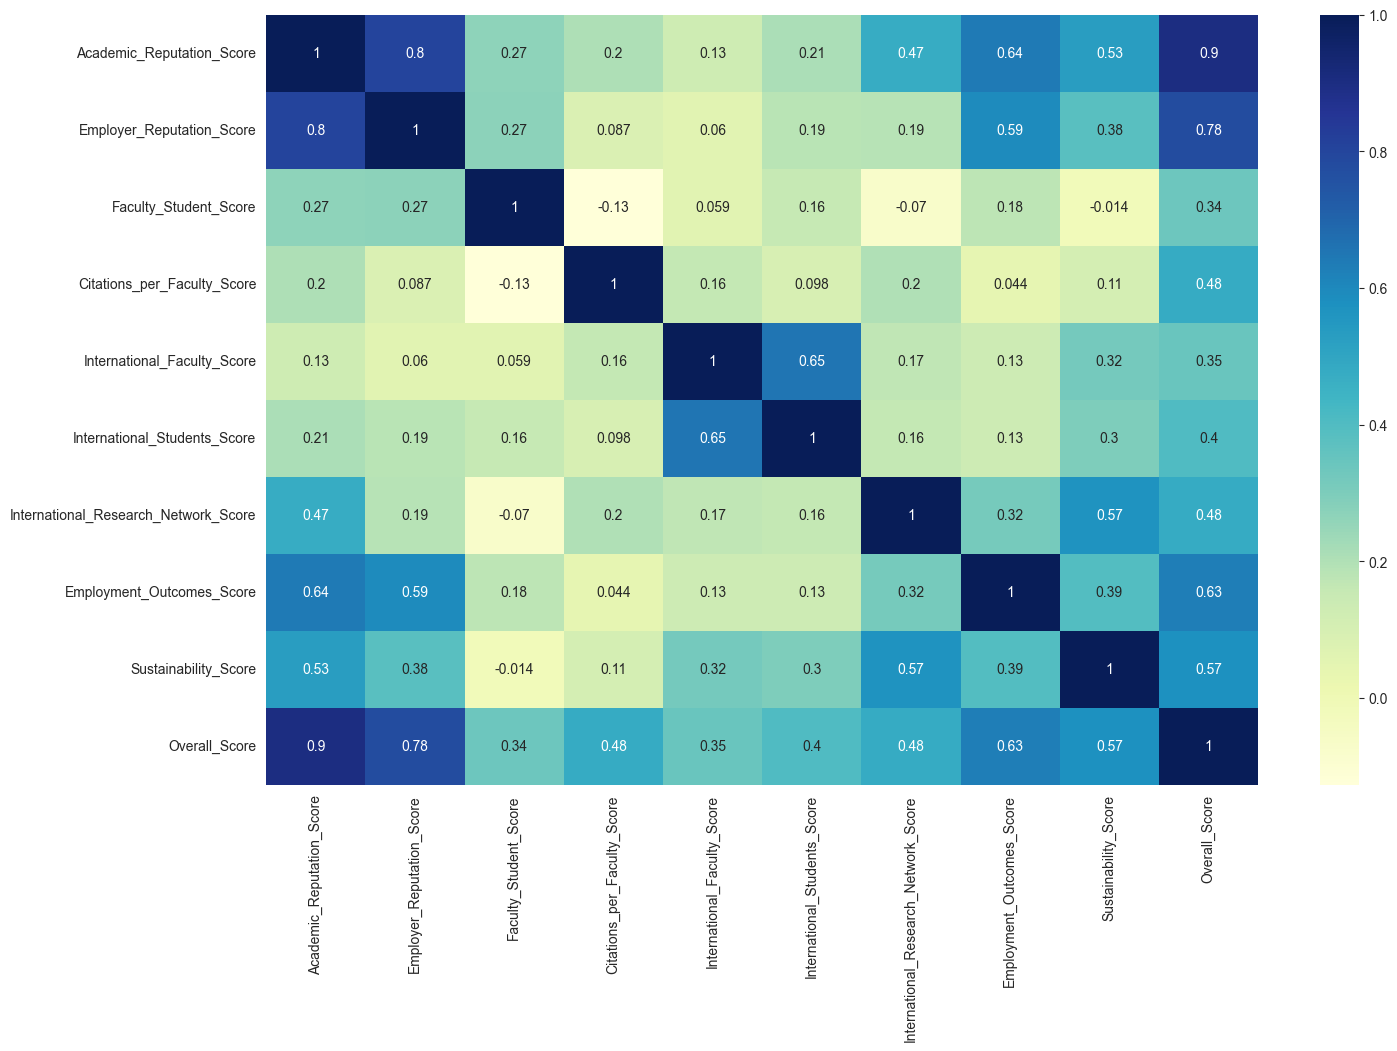

In [29]:
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (16,10)
score_columns = df.filter(like = "Score").columns
sns.heatmap(df[score_columns].corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='rank_change', ylabel='Count'>

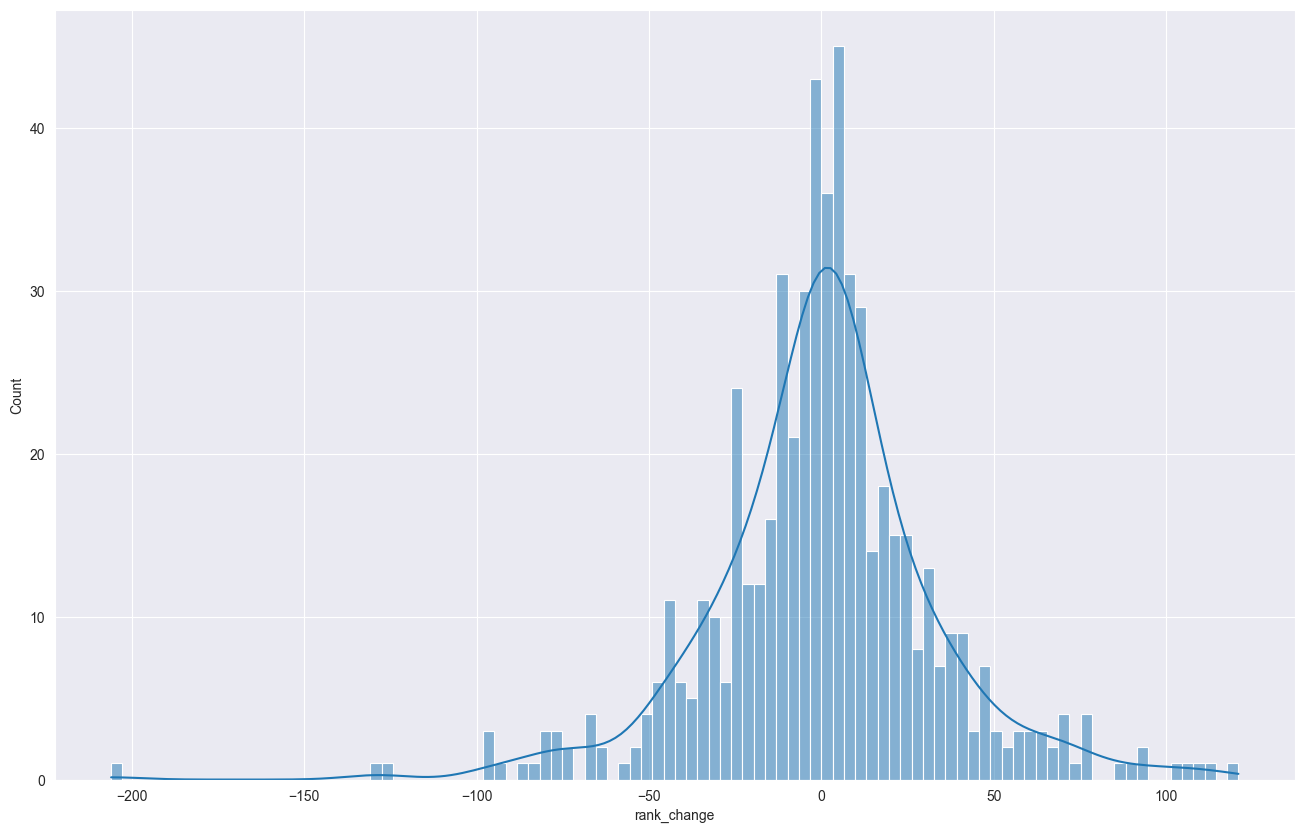

In [33]:
df["rank_change"] = df["RANK_2025"] - df["RANK_2024"]
sns.histplot(data = df , x = "rank_change" , kde = True,bins = 100)

([<matplotlib.patches.Wedge at 0x109b1dd8ec0>,
 [Text(-1.0566937474286227, 0.3056113940043045, 'Europe'),
  Text(0.4229563797510777, -1.0154348333733003, 'Asia'),
  Text(1.0027695305145656, 0.45216509006290845, 'Americas'),
  Text(0.32502146195035614, 1.0508858402660364, 'Oceania'),
  Text(0.05207818962994066, 1.0987665184946565, 'Africa')],
 [Text(-0.5763784076883396, 0.1666971240023479, '41.04%'),
  Text(0.23070347986422418, -0.5538735454763456, '30.49%'),
  Text(0.5469651984624903, 0.2466355036706773, '20.44%'),
  Text(0.1772844337911033, 0.5732104583269289, '6.53%'),
  Text(0.028406285252694903, 0.5993271919061762, '1.51%')])

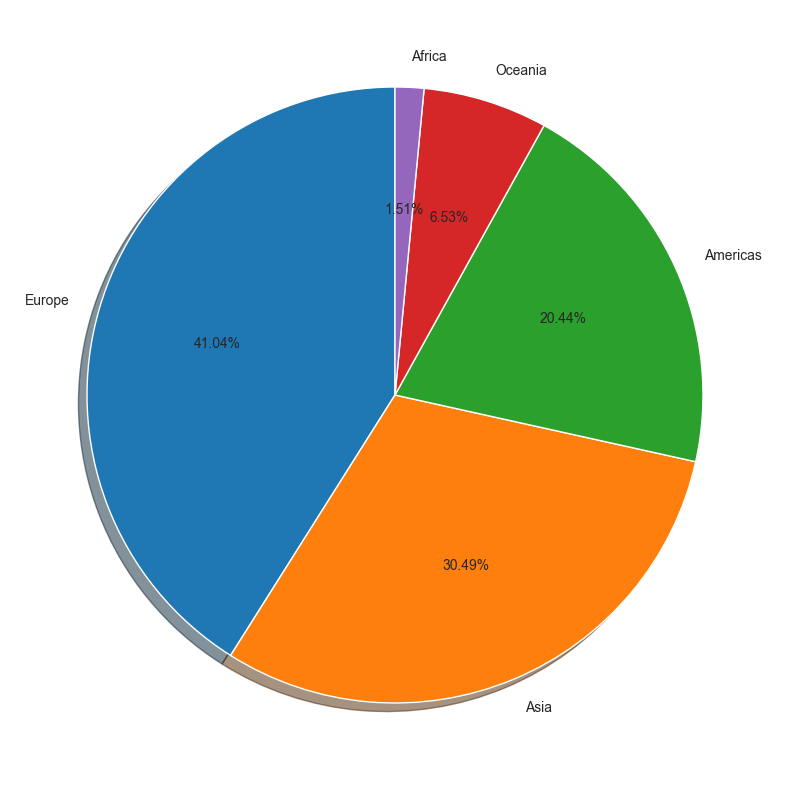

In [36]:
region_counts = df["Region"].value_counts()
plt.pie(region_counts, labels = region_counts.index,autopct = "%.2f%%",shadow = True,startangle = 90)

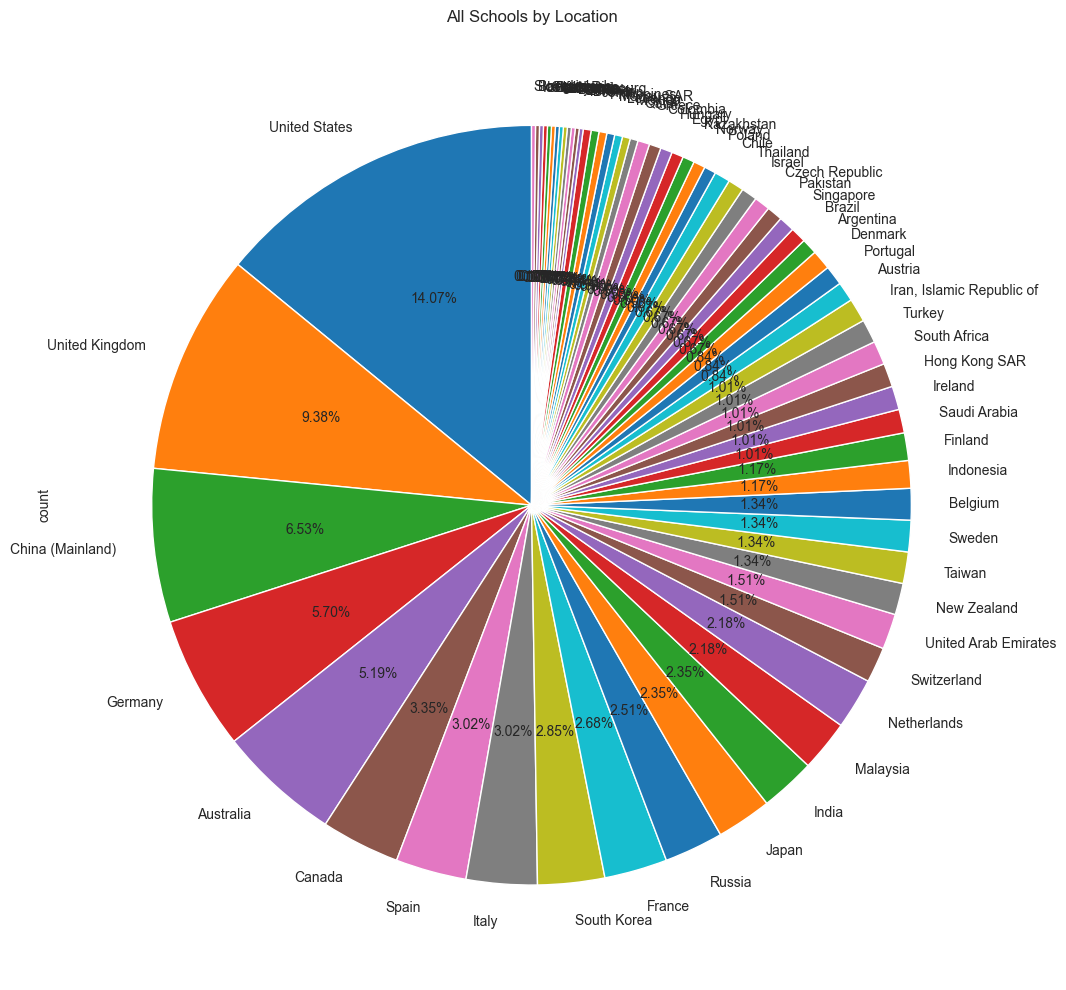

In [43]:
df["Location"].value_counts().plot.pie(autopct="%.2f%%", startangle=90)
plt.title("All Schools by Location")
plt.tight_layout()

<Axes: xlabel='Overall_Score', ylabel='Institution_Name'>

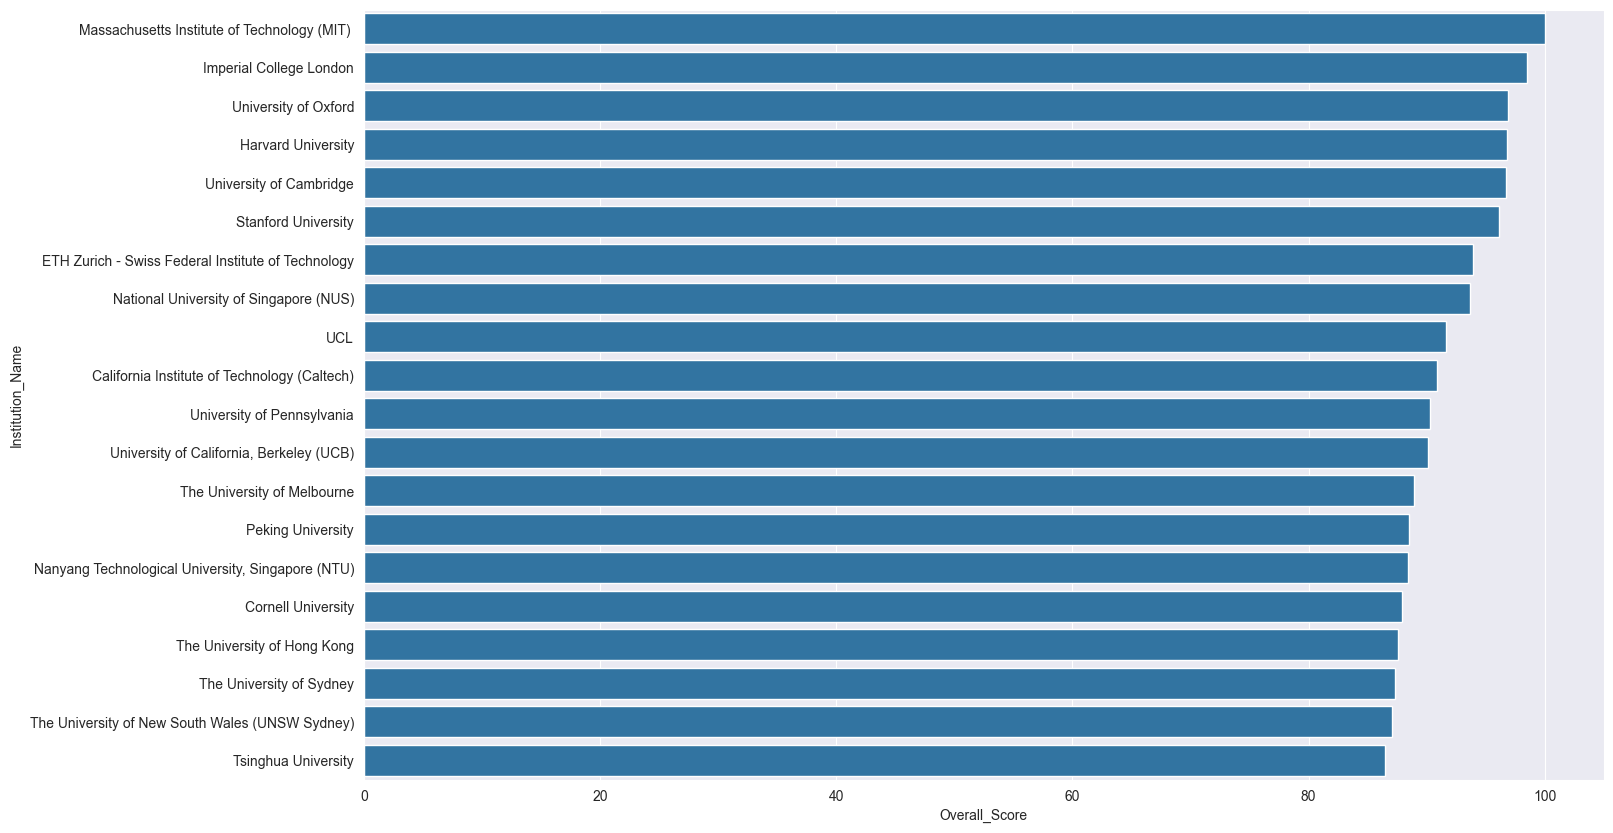

In [44]:
df.sort_values(by=["RANK_2025"], ascending = True, inplace = True)
top20 = df.head(20)
sns.barplot(data = top20, x = "Overall_Score", y = "Institution_Name")

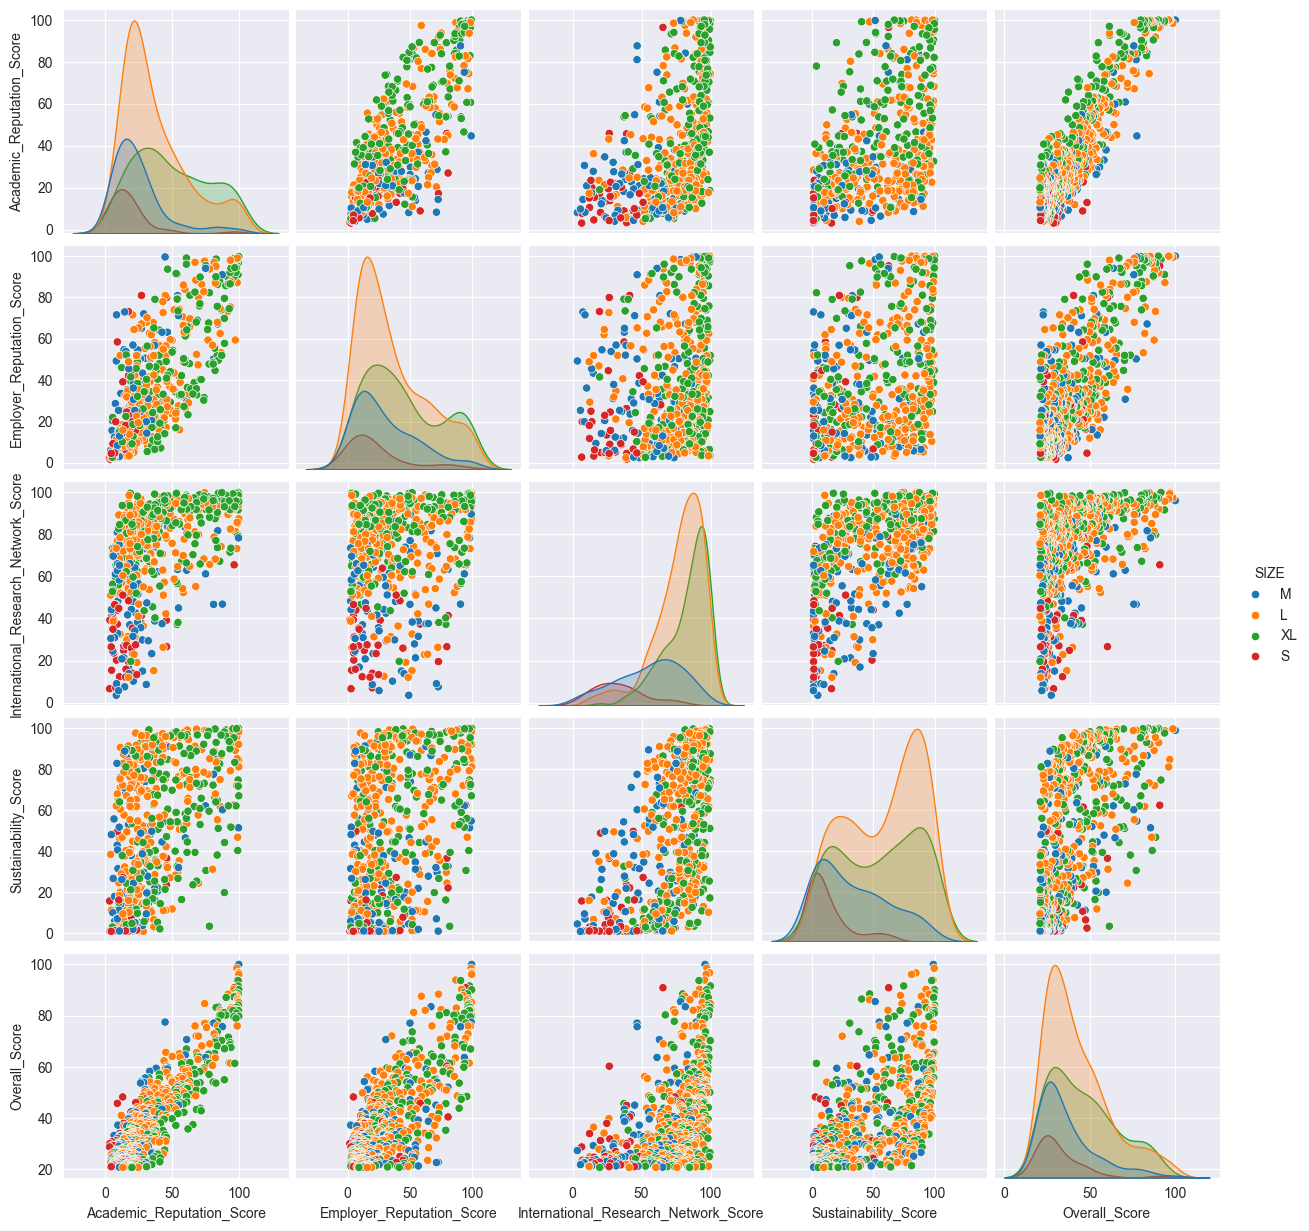

In [51]:
cols = ["Academic_Reputation_Score", "Employer_Reputation_Score", "International_Research_Network_Score",
        "Sustainability_Score", "Overall_Score", "SIZE"]
sns.pairplot(data=df[cols], hue="SIZE")